In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [10]:
dataset = np.array(
    
[[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-12, -38], #salvador
[-8, -34], #recife
[-16, -49], #goiania
[-3, -60], #manaus
[-22, -47], #campinas
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63]] #porto velho
 )

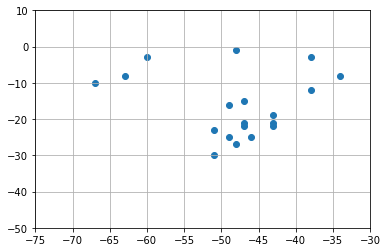

In [17]:
plt.scatter(dataset[:,1], dataset[:,0])
plt.xlim(-75,-30)
plt.ylim(-50,10)
plt.grid()

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter=300)
pred_y = kmeans.fit_predict(dataset)

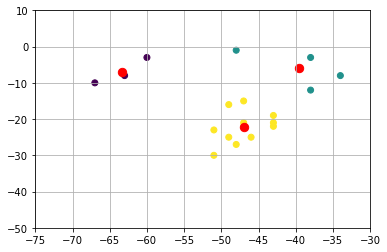

In [23]:
plt.scatter(dataset[:,1], dataset[:,0], c= pred_y)
plt.xlim(-75,-30)
plt.ylim(-50,10)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s= 70, c = 'red')
plt.show()

In [25]:
kmeans.cluster_centers_

array([[ -7.        , -63.33333333],
       [ -6.        , -39.5       ],
       [-22.16666667, -47.        ]])

#### Adicionando mais dados

In [26]:
dataset = np.array([
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-25, -46], #são paulo
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-22, -43], #rio de janeiro
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-25, -49], #curitiba
[-30, -51], #porto alegre
[-30, -51], #porto alegre
[-30, -51], #porto alegre
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-19, -43], #belo horizonte
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-15, -47], #brasilia
[-12, -38], #salvador
[-12, -38], #salvador
[-12, -38], #salvador
[-8, -34], #recife
[-8, -34], #recife
[-8, -34], #recife
[-16, -49], #goiania
[-16, -49], #goiania
[-3, -60], #manaus
[-3, -60], #manaus
[-3, -60], #manaus
[-3, -60], #manaus
[-22, -47], #campinas
[-22, -47], #campinas
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-3, -38], #fortaleza
[-21, -47], #ribeirão preto
[-23, -51], #maringa
[-27, -48], #florianópolis
[-27, -48], #florianópolis
[-21, -43], #juiz de fora
[-1, -48], #belém
[-1, -48], #belém
[-1, -48], #belém
[-1, -48], #belém
[-10, -67], #rio branco
[-8, -63] #porto velho
])

In [42]:
kmeans = KMeans(n_clusters = 3, init= 'random', n_init=10, max_iter=300)
pred_y = kmeans.fit_predict(dataset)

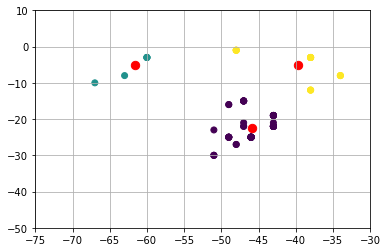

In [43]:
plt.scatter(dataset[:,1], dataset[:,0], c= pred_y)
plt.xlim(-75, -30)
plt.ylim(-50, 10)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s= 70, c='red')
plt.show()

In [44]:
kmeans.cluster_centers_

array([[-22.55384615, -45.90769231],
       [ -5.        , -61.66666667],
       [ -5.125     , -39.75      ]])

###### https://medium.com/programadores-ajudando-programadores/k-means-o-que-%C3%A9-como-funciona-aplica%C3%A7%C3%B5es-e-exemplo-em-python-6021df6e2572

#### Elbow Method to find best N_CLUSTER param

In [53]:
from sklearn import datasets
iris = datasets.load_iris()
df=pd.DataFrame(iris['data'])

In [58]:
distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

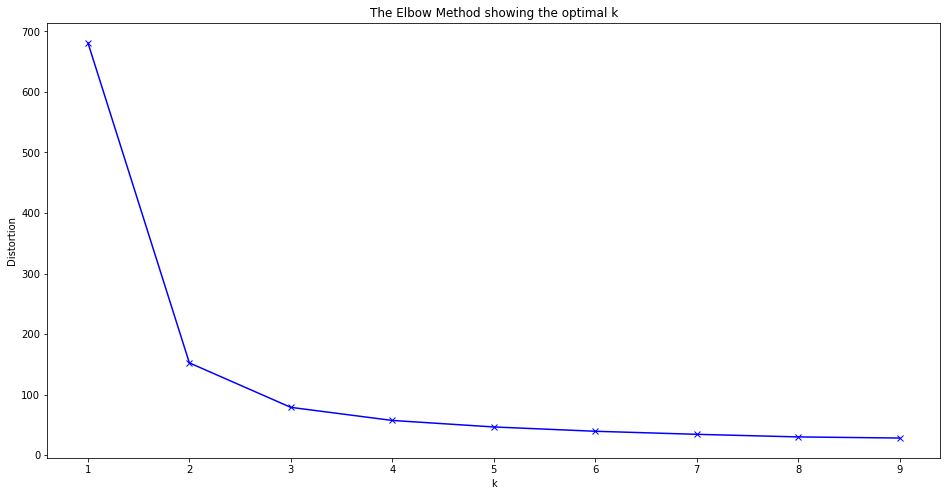

In [61]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Text(0.5, 1.0, 'K_means')

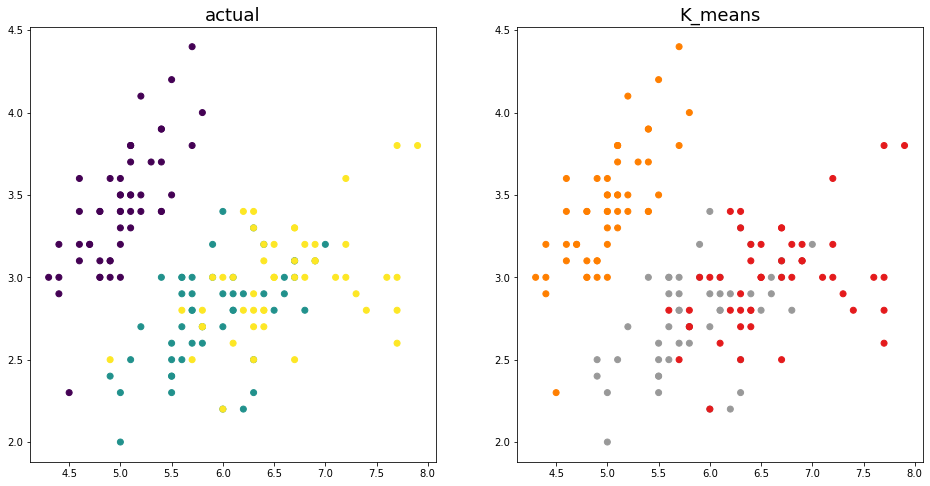

In [69]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

df['k_means'] = kmeanModel.predict(df)
df['target'] = iris['target']

fig, axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('actual', fontsize=18)
axes[1].set_title('K_means', fontsize=18)

###### https://predictivehacks.com/k-means-elbow-method-code-for-python/